Sherry Zhang
4/20/22

McDonald's Death Prediction/Analysis

Question:
When is McDonalds going to die/fail?

I originally planned to do a study based upon when an individual restaurant was going to close or the rate of success they might have. Unfortunately, I couldn’t find any data released by the McDonald’s corporation on individual stores like when they opened, closed, and their profit. So instead I pivoted to see how long McDonald’s as a corporation would last overall. From McDonald's annual reports, I was able to get data such as the amount of stores opened, closed, corporate, franchised, etc.

Datasets:
MCD stock data - taken from yahoo finance
Locations - for 2022
Open Close each year - created by myself from McDonald's annual reports


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

stock_data = pd.read_csv('Data/stocks.csv')
# print(stock_data)

year = []
month = []
for ind in stock_data.index:
    year.append(int(stock_data['Date'][ind][0:4]))
    month.append(stock_data['Date'][ind][0:7])

stock_data.insert(1, 'Year', year)
stock_data.insert(0, 'Month', month)

stock_data = stock_data.drop(stock_data[stock_data.Year < 2000].index)
stock_data = stock_data[['Date', 'Year', 'Month', 'High']]

month_avg_stocks = pd.DataFrame(stock_data.groupby(by='Month')['High'].mean(), columns=['High'])

month = list(month_avg_stocks.index.values)

month_avg_stocks.insert(0, 'Month', month)
month_avg_stocks.reset_index(inplace = True, drop = True)
# print(month_avg_stocks)

store_num_data = pd.read_csv('Data/open close data.csv')

locations = pd.read_csv('Data\locations.csv')
print(locations)

# print(stock_data)
# print(store_num_data)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 199045: invalid continuation byte

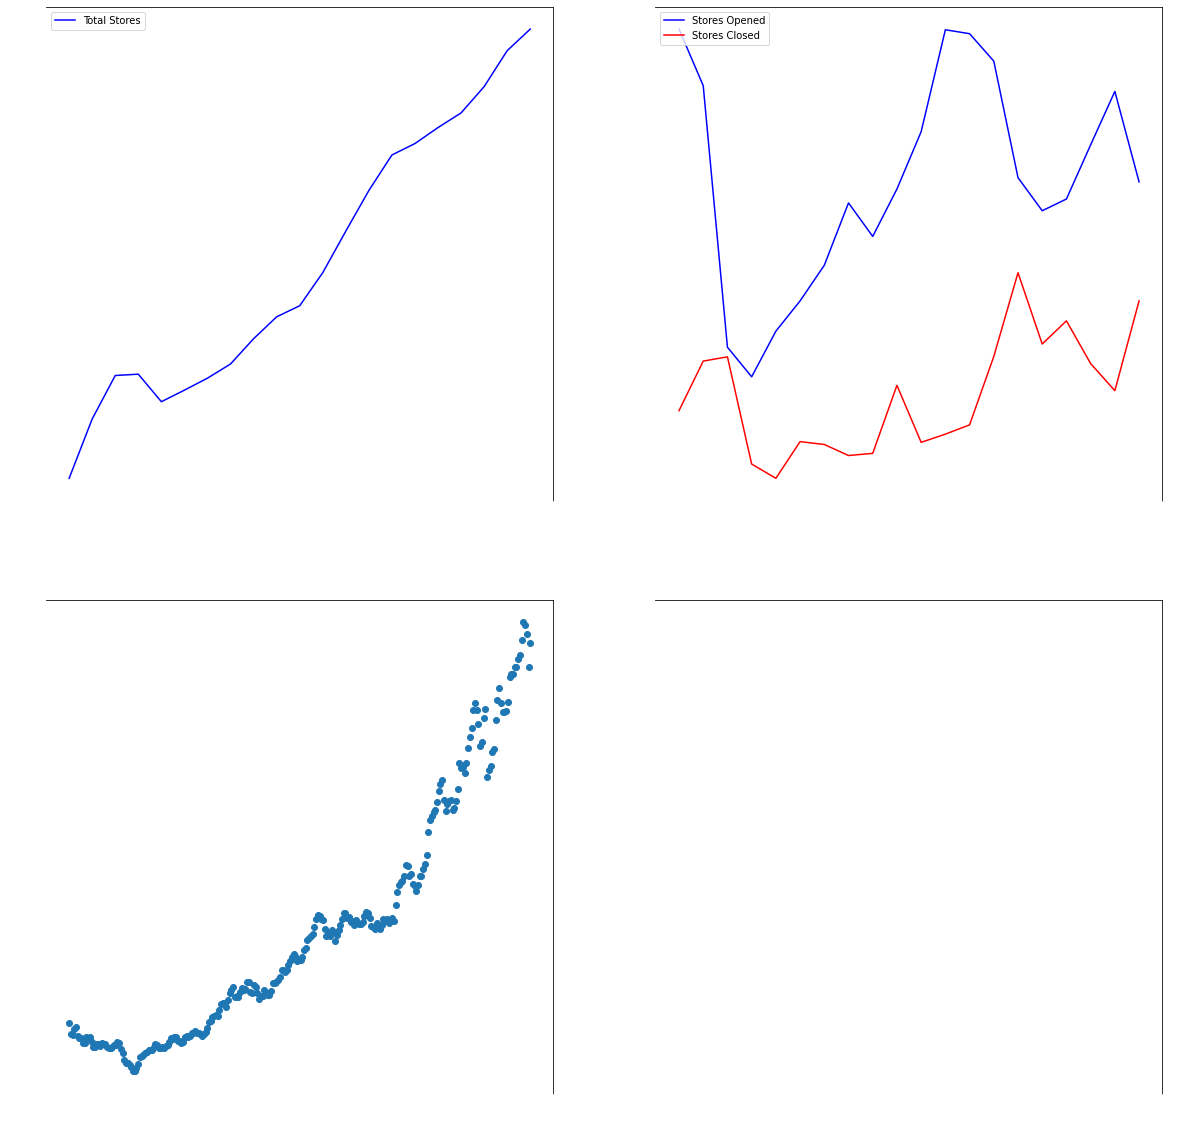

In [ ]:
figure, ax = plt.subplots(2, 2)

figure.set_size_inches(20, 20)

ax[0][0].plot(store_num_data['Year'], store_num_data['Total Stores'], color='b', label='Total Stores')
ax[0][0].legend(loc="upper left")

ax[0][0].set_xticks(list(store_num_data['Year'])[::-2])

ax[0][1].plot(store_num_data['Year'], store_num_data['Stores Opened'], color='b', label='Stores Opened')
ax[0][1].plot(store_num_data['Year'], store_num_data['Stores Closed'], color='r', label='Stores Closed')
ax[0][1].legend(loc="upper left")

ax[0][1].set_xticks(list(store_num_data['Year'])[::-2])

ax[1][0].scatter(month_avg_stocks['Month'], month_avg_stocks['High'])
ax[1][0].set_xticks(list(month_avg_stocks['Month'])[::36])
ax[1][0].set_xlabel('Stock Avg Each Month', color='white')

#Make axis/labels white
for row in range(0,2):
    for column in range(0,2):
        ax[row][column].spines['bottom'].set_color('white')
        ax[row][column].xaxis.label.set_color('white')
        ax[row][column].tick_params(axis='x', colors='white')
        ax[row][column].spines['left'].set_color('white')
        ax[row][column].yaxis.label.set_color('white')
        ax[row][column].tick_params(axis='y', colors='white')